In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [2]:
data=pd.read_csv('dataset_comb.csv')

In [3]:
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine


In [4]:
kfold = 7
n = data.shape[0] // kfold 
k_fold_s = KFold(shuffle=True,n_splits=7)
folds =  [data[i: i + n] for i in range(0, len(data), n)]

In [6]:
models= [
          ('LogReg', LogisticRegression(max_iter=1000)), 
          ('LDA', LinearDiscriminantAnalysis()),
          ('NB', GaussianNB()),
          ('SVM', svm.SVC()), 
          ('ANN', MLPClassifier(hidden_layer_sizes=(10, 10, 10),alpha=0.0001, max_iter=10000,solver='adam')),
          ('Perc',Perceptron(tol=1e-3, random_state=0,alpha=0.0001))
]

results = []
names = []
tr_accuracy = []

for name, model in models:
  add_val = []
  names.append(name)
  cv_results = cross_val_score(model, pd.DataFrame(data.iloc[:,1:-1]), data['Class'], cv=k_fold_s)

  results.append(cv_results)

  for i in range(kfold):
    train_data = []
    test_data = folds[i]

    y_test=test_data['Class']
    X_test=test_data.drop(['Class','id'],axis=1)

    for j in range(kfold):
      if i != j:
        train_data.append(folds[j])
    
    temp = train_data[0]
    for k in range(1, kfold-1):
      temp = pd.concat([temp, train_data[k]], ignore_index=True)

    y_train=temp['Class']
    X_train=temp.drop(['Class','id'],axis=1)
    
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    val = accuracy_score(y_test, y_pred)
    add_val.append(val)
  tr_accuracy.append(add_val)
  # print((tr_accuracy))
  # print("****")

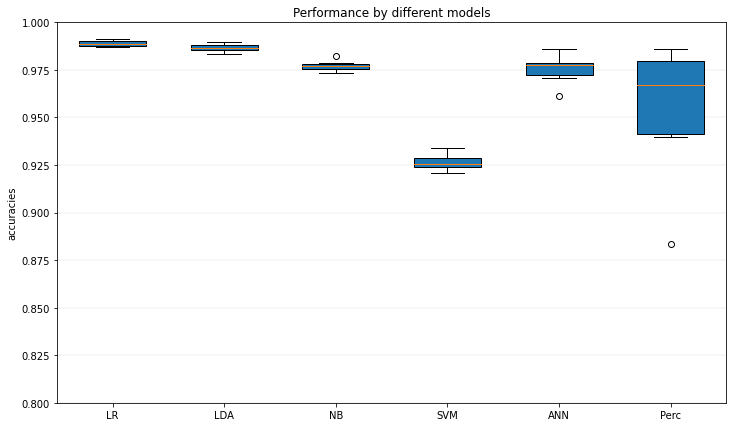

In [7]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_ylim(0.8 ,1)

plt.boxplot([results[0],results[1],results[2],results[3],results[4],results[5]],widths = 0.6, patch_artist = True)

ax.set_title('Performance by different models')
ax.set_ylabel('accuracies')

plt.xticks([1, 2, 3, 4, 5, 6], ['LR', 'LDA', 'NB', 'SVM', 'ANN', 'Perc'])

plt.show()